Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [42]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the data
df = pd.read_csv('./archive/twitter_training.csv')
df

,ID,Brand,Sentiment,Text
0,1,Amazon,Negative,@amazon wtf .
1,1,Amazon,Negative,@ amazon wtf.
2,1,Amazon,Negative,@ amazon wtf.
3,1,Amazon,Negative,@amazon wtf?
4,1,Amazon,Negative,7 @amazon wtf.
...,...,...,...,...
74677,13200,Xbox(Xseries),Irrelevant,Amazing deal I found on ebay for a RAZER HEADS...
74678,13200,Xbox(Xseries),Irrelevant,An amazing deal that I found on ebay in a very...
74679,13200,Xbox(Xseries),Irrelevant,Amazing deal just found on Yahoo for a RAZER H...
74680,13200,Xbox(Xseries),Irrelevant,More Amazing deal I found out on ebay looked f...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Brand      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


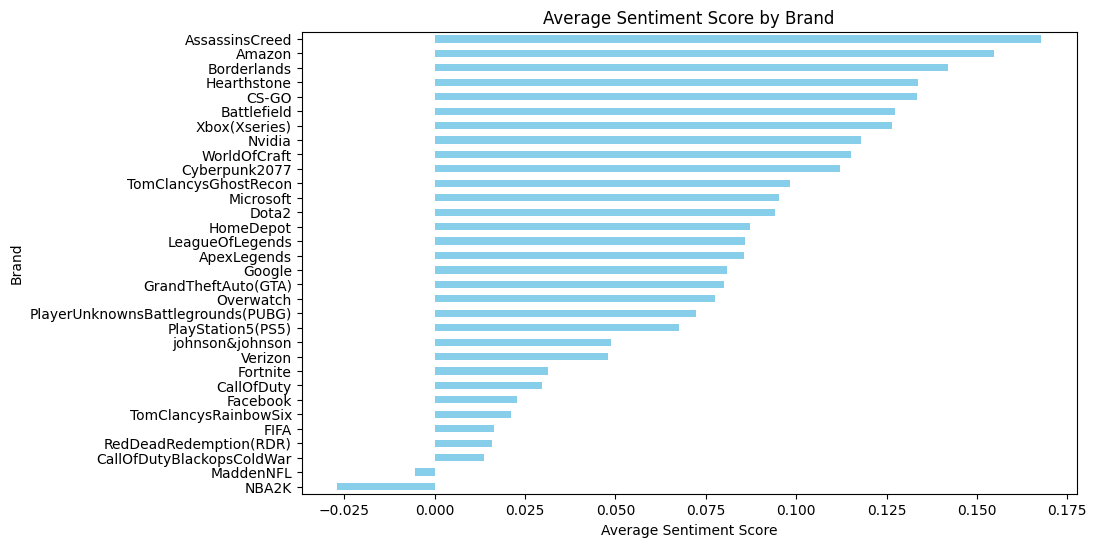

In [44]:
# Drop rows with missing or incorrect text values
df = df.dropna(subset=['Text'])
df = df[df['Text'].apply(lambda x: isinstance(x, str))]
# Perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

df['Sentiment'] = df['Text'].apply(analyze_sentiment)

# Aggregate sentiment scores by brand
brand_sentiment = df.groupby('Brand')['Sentiment'].mean()

# Visualize sentiment patterns
plt.figure(figsize=(10, 6))
brand_sentiment.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Brand')
plt.title('Average Sentiment Score by Brand')
plt.show()

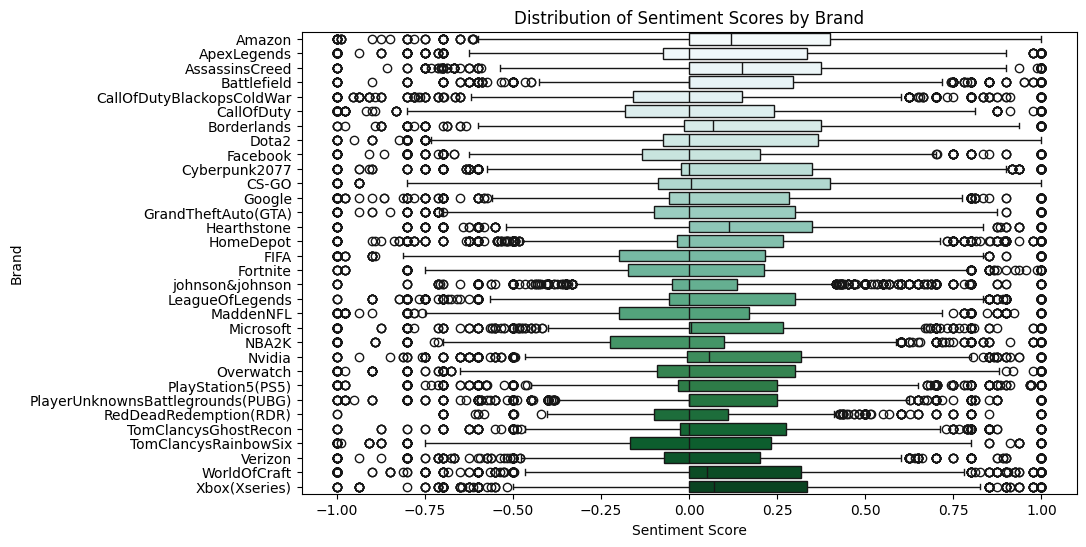

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Brand', data=df, palette='BuGn',hue='Brand', legend=False)
plt.xlabel('Sentiment Score')
plt.ylabel('Brand')
plt.title('Distribution of Sentiment Scores by Brand')
plt.show()


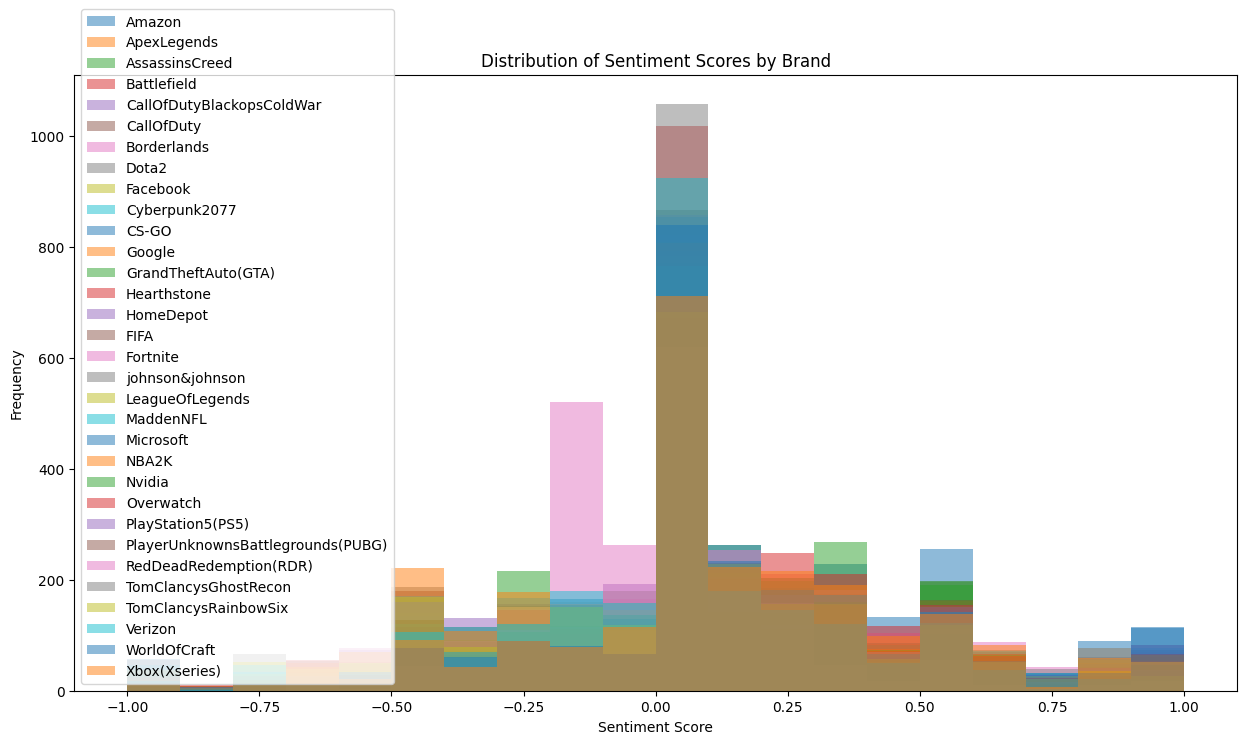

In [46]:
# Iterate over unique brands and create histograms for each
unique_brands = df['Brand'].unique()
plt.figure(figsize=(15, 8))
for brand in unique_brands:
    plt.hist(df[df['Brand'] == brand]['Sentiment'], bins=20, alpha=0.5, label=brand)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores by Brand')
plt.legend()
plt.show()


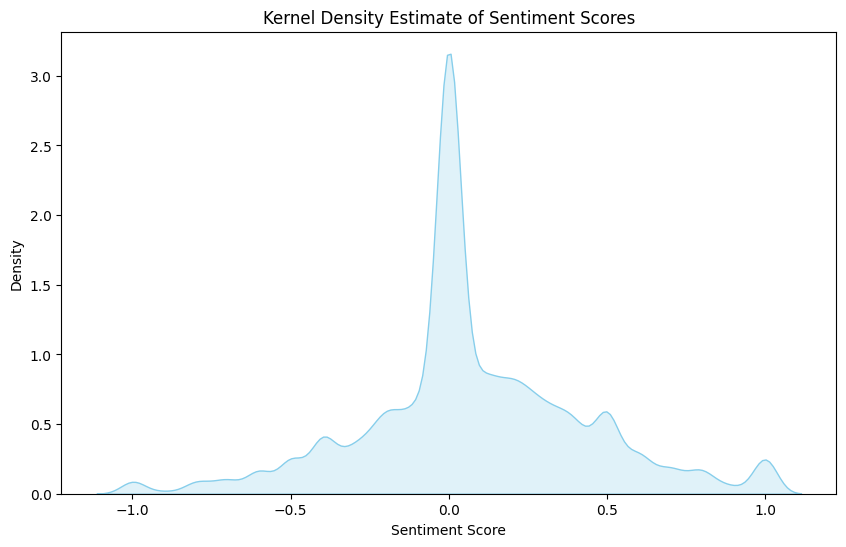

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sentiment'], color='skyblue',fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Sentiment Scores')
plt.show()


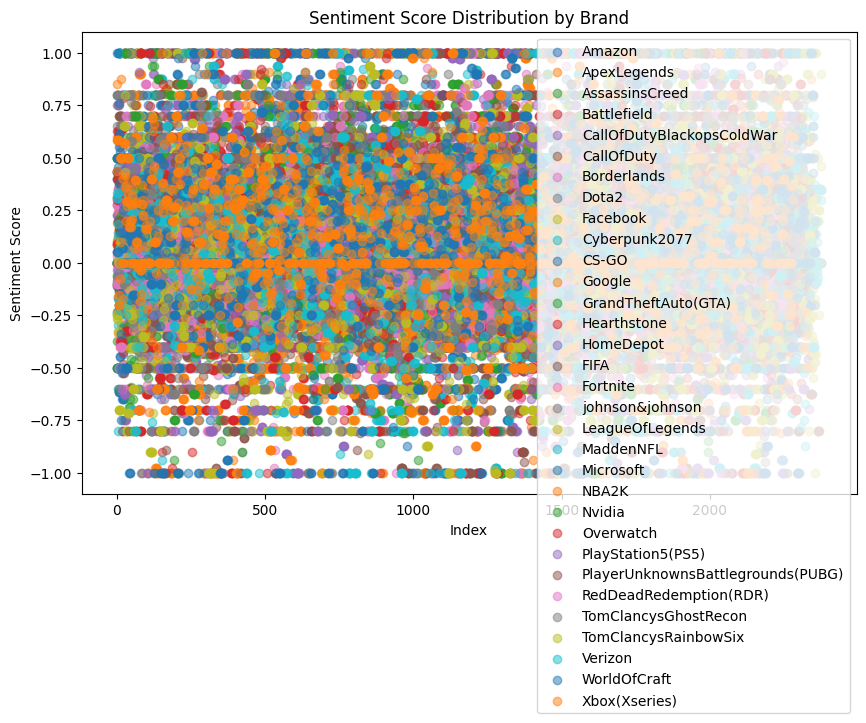

In [49]:
plt.figure(figsize=(10, 6))

# Iterate over unique brands and plot scatter points for each brand
unique_brands = df['Brand'].unique()
for brand in unique_brands:
    brand_data = df[df['Brand'] == brand]
    plt.scatter(range(len(brand_data)), brand_data['Sentiment'], label=brand, alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution by Brand')
plt.legend()
plt.show()



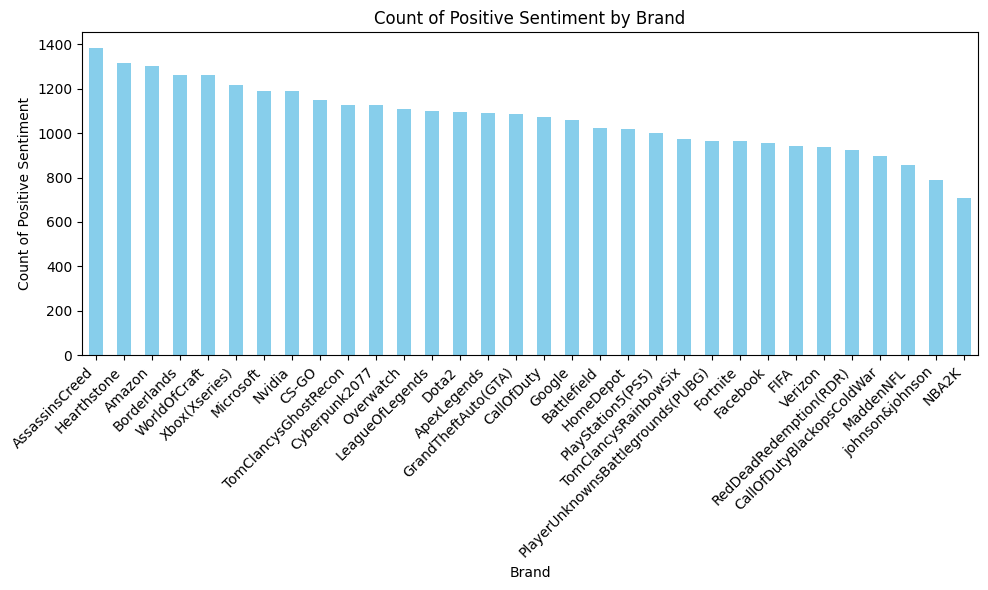

In [50]:
# Filter the DataFrame to include only positive sentiment scores
positive_df = df[df['Sentiment'] > 0]

# Count the number of positive sentiment scores for each brand
positive_counts = positive_df['Brand'].value_counts()

plt.figure(figsize=(10, 6))
positive_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Count of Positive Sentiment')
plt.title('Count of Positive Sentiment by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


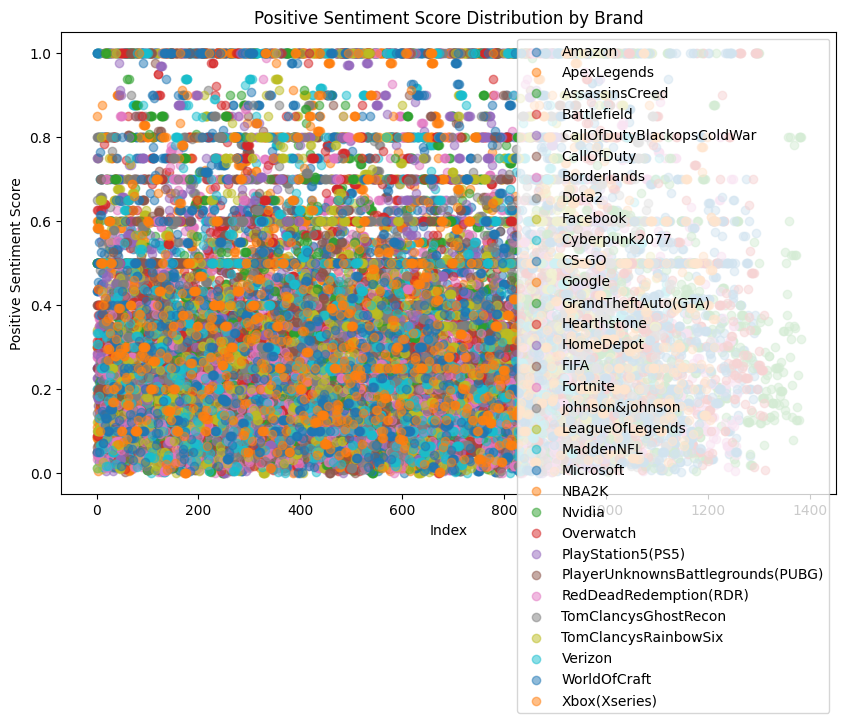

In [51]:
# Filter the DataFrame to include only positive sentiment scores
positive_df = df[df['Sentiment'] > 0]

plt.figure(figsize=(10, 6))

# Iterate over unique brands and plot scatter points for each brand
unique_brands = positive_df['Brand'].unique()
for brand in unique_brands:
    brand_data = positive_df[positive_df['Brand'] == brand]
    plt.scatter(range(len(brand_data)), brand_data['Sentiment'], label=brand, alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Positive Sentiment Score')
plt.title('Positive Sentiment Score Distribution by Brand')
plt.legend()
plt.show()


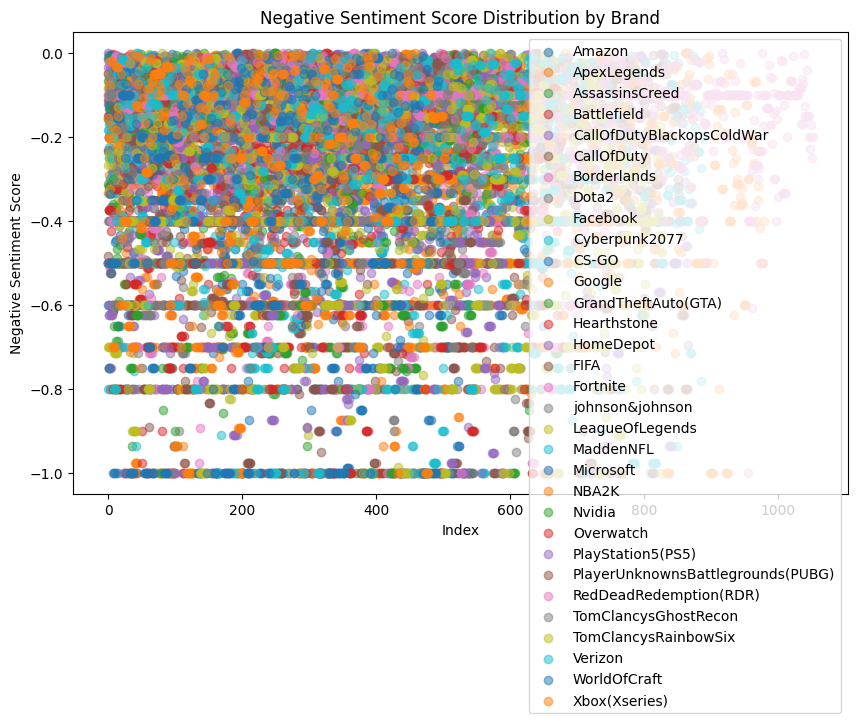

In [52]:
# Filter the DataFrame to include only negative sentiment scores
negative_df = df[df['Sentiment'] < 0]

plt.figure(figsize=(10, 6))

# Iterate over unique brands and plot scatter points for each brand
unique_brands = negative_df['Brand'].unique()
for brand in unique_brands:
    brand_data = negative_df[negative_df['Brand'] == brand]
    plt.scatter(range(len(brand_data)), brand_data['Sentiment'], label=brand, alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Negative Sentiment Score')
plt.title('Negative Sentiment Score Distribution by Brand')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

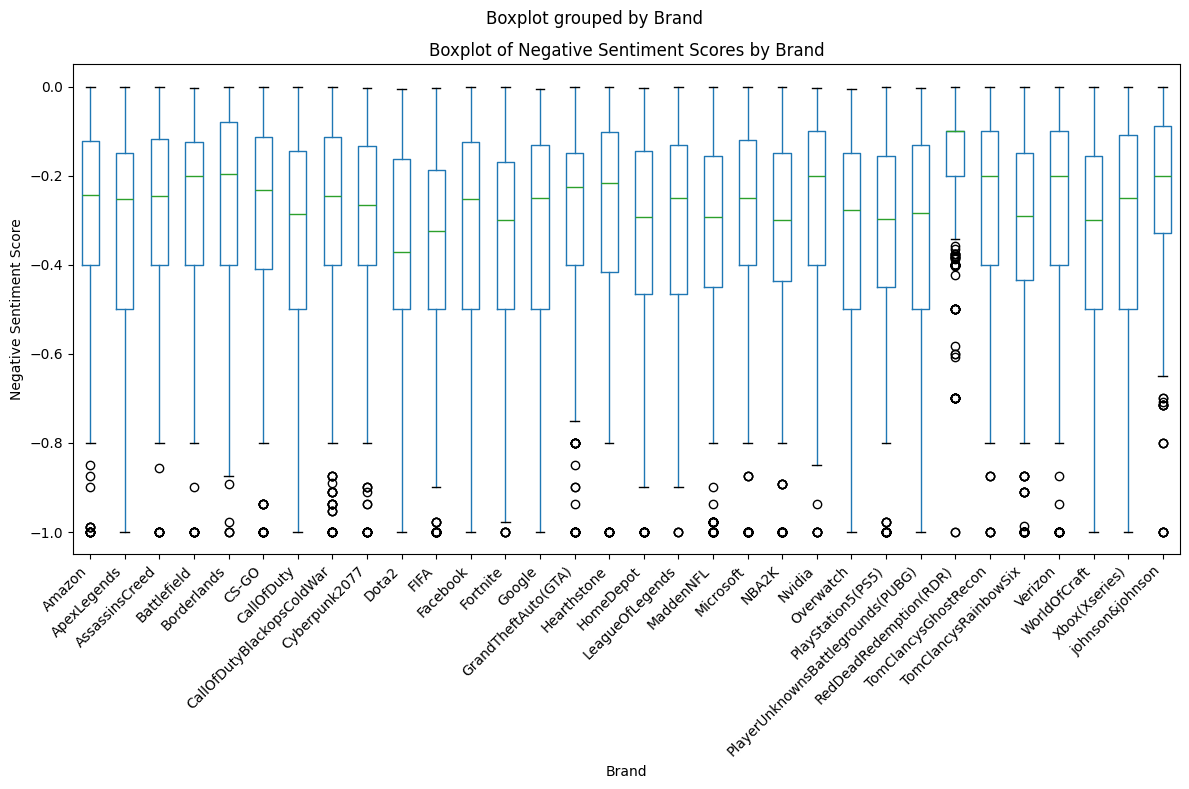

In [53]:
# Filter the DataFrame to include only negative sentiment scores
negative_df = df[df['Sentiment'] < 0]

plt.figure(figsize=(10, 6))
# Create a boxplot for negative sentiment scores, with 'Brand' on the y-axis
negative_df.boxplot(column='Sentiment', by='Brand', figsize=(12, 8), grid=False)
plt.xlabel('Brand')
plt.ylabel('Negative Sentiment Score')
plt.title('Boxplot of Negative Sentiment Scores by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


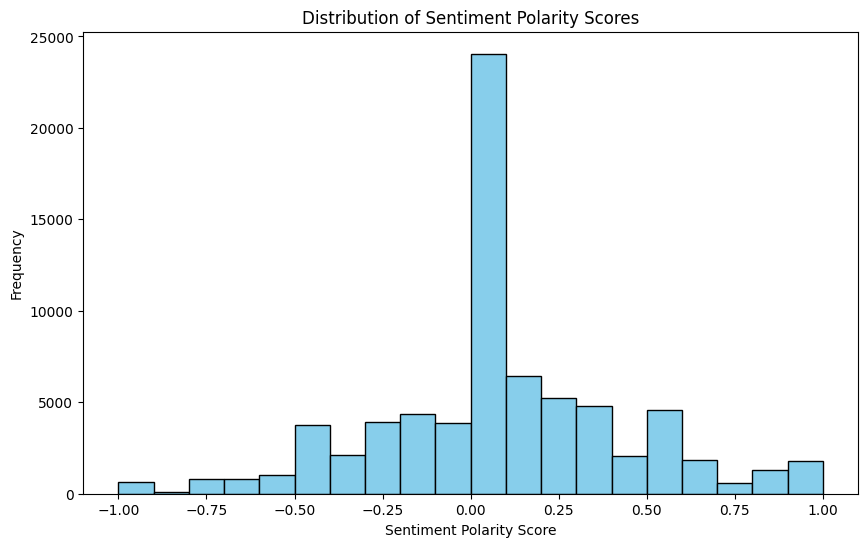

In [54]:
# Perform sentiment analysis on each text
sentiment_scores = [TextBlob(text).sentiment.polarity for text in df['Text']]

# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity Scores')
plt.show()


Enter the brand name:  Amazon


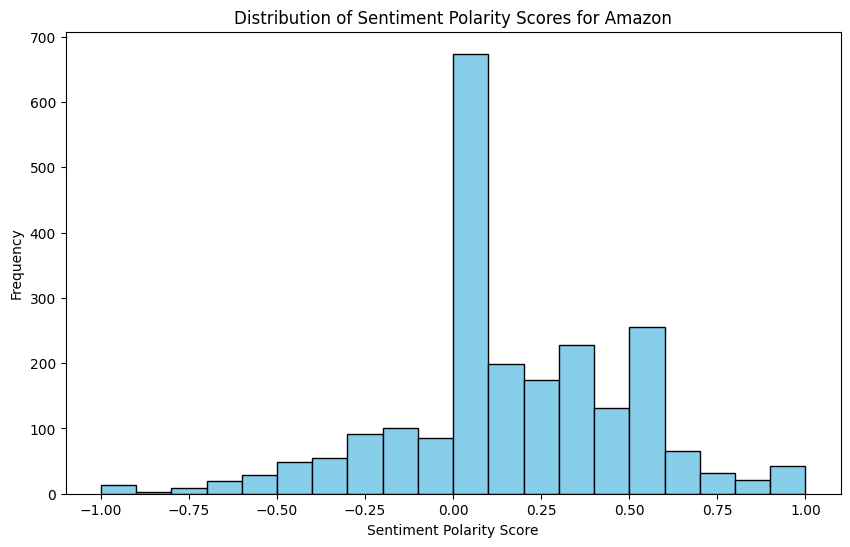

In [62]:
# User input for the brand name
selected_brand = input("Enter the brand name: ")

# Filter the DataFrame for the selected brand
brand_data = df[df['Brand'] == selected_brand]

# Perform sentiment analysis on the text data for the selected brand
sentiment_scores = [TextBlob(text).sentiment.polarity for text in brand_data['Text']]

# Plot histogram of sentiment polarity scores for the selected brand
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Sentiment Polarity Scores for {selected_brand}')
plt.show()


Enter the brand name:  Amazon


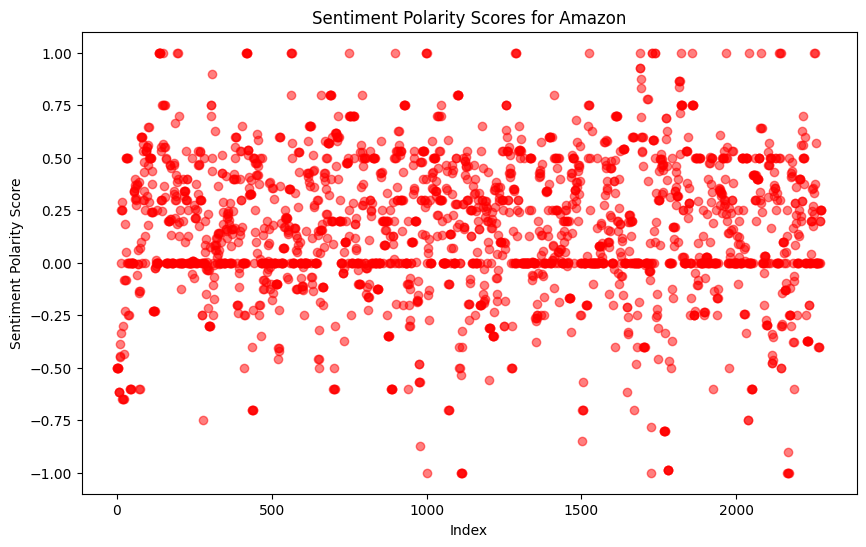

In [65]:
# User input for the brand name
selected_brand = input("Enter the brand name: ")

# Filter the DataFrame for the selected brand
brand_data = df[df['Brand'] == selected_brand]

# Perform sentiment analysis on the text data for the selected brand
sentiment_scores = [TextBlob(text).sentiment.polarity for text in brand_data['Text']]

# Plot scatter plot of sentiment polarity scores for the selected brand
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sentiment_scores)), sentiment_scores, color='Red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Sentiment Polarity Score')
plt.title(f'Sentiment Polarity Scores for {selected_brand}')
plt.show()
